In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline

In [2]:
y2015 = pd.read_csv('LoanStats3d.csv', skipinitialspace=True, header=1)

/home/diegofvargas/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
y2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,23850.0,23850.0,23850.0,60 months,17.27%,596.21,D,D3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,15000.0,15000.0,15000.0,60 months,10.78%,324.50,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,7200.0,7200.0,7200.0,36 months,17.27%,257.67,D,D3,...,NaN,NaN,Cash,Y,May-2018,BROKEN,Nov-2017,2761.0,50.01,10.0
3,NaN,NaN,12000.0,12000.0,12000.0,36 months,9.17%,382.55,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,11950.0,11950.0,11950.0,36 months,13.44%,405.18,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
y2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421097 entries, 0 to 421096
Columns: 145 entries, id to settlement_term
dtypes: float64(107), object(38)
memory usage: 465.8+ MB


In [5]:
y2015.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,421095.000000,421095.000000,421095.000000,421095.000000,4.210950e+05,0.0,421093.000000,421095.000000,421095.000000,...,2507.0,2507.000000,2507.0,2507.000000,2042.000000,2507.000000,2507.000000,10878.000000,10878.000000,10878.000000
mean,NaN,15240.285862,15240.285862,15234.156426,441.843521,7.696561e+04,NaN,19.148367,0.347397,0.572690,...,3.0,118.418556,3.0,14.155564,350.938178,9297.363470,183.339326,4914.018099,47.259191,12.679077
std,NaN,8571.325901,8571.325901,8567.935757,244.846806,7.394996e+04,NaN,8.885104,0.927695,0.867776,...,0.0,97.821184,0.0,9.760977,287.943464,6184.700742,182.550892,3556.698210,6.262224,7.802133
min,NaN,1000.000000,1000.000000,900.000000,14.010000,0.000000e+00,NaN,0.000000,0.000000,0.000000,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.020000,107.000000,0.450000,0.000000
25%,NaN,8500.000000,8500.000000,8500.000000,263.930000,4.600000e+04,NaN,12.590000,0.000000,0.000000,...,3.0,40.735000,3.0,6.000000,121.470000,4111.550000,40.850000,2117.185000,45.000000,6.000000
50%,NaN,14000.000000,14000.000000,14000.000000,385.410000,6.500000e+04,NaN,18.600000,0.000000,0.000000,...,3.0,92.710000,3.0,15.000000,275.760000,8238.260000,130.090000,4200.000000,45.000000,12.000000
75%,NaN,20000.000000,20000.000000,20000.000000,578.790000,9.169050e+04,NaN,25.340000,0.000000,1.000000,...,3.0,167.670000,3.0,23.000000,501.277500,13349.235000,274.105000,6812.772500,50.000000,18.000000
max,NaN,35000.000000,35000.000000,35000.000000,1445.460000,9.500000e+06,NaN,999.000000,39.000000,6.000000,...,3.0,638.130000,3.0,30.000000,1914.390000,29401.040000,1247.480000,30000.000000,166.670000,112.000000


In [6]:
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

In [7]:
y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util', 'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

In [8]:
y2015.dropna(axis='columns', how='all', inplace=True)

In [9]:
y2015.dropna(how='all', inplace=True)

In [10]:
y2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421095 entries, 0 to 421094
Columns: 124 entries, loan_amnt to settlement_term
dtypes: float64(95), object(29)
memory usage: 401.6+ MB


In [11]:
y2015.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,23850.0,23850.0,23850.0,60 months,17.27,596.21,D,10+ years,OWN,68046.0,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,15000.0,15000.0,15000.0,60 months,10.78,324.50,B,10+ years,MORTGAGE,65000.0,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,7200.0,7200.0,7200.0,36 months,17.27,257.67,D,9 years,OWN,20000.0,...,NaN,NaN,Cash,Y,May-2018,BROKEN,Nov-2017,2761.0,50.01,10.0
3,12000.0,12000.0,12000.0,36 months,9.17,382.55,B,4 years,MORTGAGE,39400.0,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,4 years,RENT,34000.0,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
y2015[['debt_settlement_flag_date','settlement_status','settlement_date','settlement_amount','settlement_percentage','settlement_term']].isnull().sum()

debt_settlement_flag_date    410217
settlement_status            410217
settlement_date              410217
settlement_amount            410217
settlement_percentage        410217
settlement_term              410217
dtype: int64

In [13]:
y2015.drop(['debt_settlement_flag_date','settlement_status','settlement_date','settlement_amount','settlement_percentage','settlement_term'], 1, inplace=True)

In [14]:
y2015.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag
0,23850.0,23850.0,23850.0,60 months,17.27,596.21,D,10+ years,OWN,68046.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N
1,15000.0,15000.0,15000.0,60 months,10.78,324.50,B,10+ years,MORTGAGE,65000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N
2,7200.0,7200.0,7200.0,36 months,17.27,257.67,D,9 years,OWN,20000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,Y
3,12000.0,12000.0,12000.0,36 months,9.17,382.55,B,4 years,MORTGAGE,39400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N
4,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,4 years,RENT,34000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N


In [15]:
y2015.loc[:,'hardship_end_date':].isnull().sum()

hardship_end_date                             418588
payment_plan_start_date                       418588
hardship_length                               418588
hardship_dpd                                  418588
hardship_loan_status                          418588
orig_projected_additional_accrued_interest    419053
hardship_payoff_balance_amount                418588
hardship_last_payment_amount                  418588
disbursement_method                                0
debt_settlement_flag                               0
dtype: int64

In [16]:
y2015.drop(['hardship_end_date','payment_plan_start_date','hardship_length','hardship_dpd','hardship_loan_status','orig_projected_additional_accrued_interest','hardship_payoff_balance_amount','hardship_last_payment_amount'], 1, inplace=True)

In [17]:
y2015.dropna(axis='columns', thresh=200000, inplace=True)

In [18]:
y2015.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,23850.0,23850.0,23850.0,60 months,17.27,596.21,D,10+ years,OWN,68046.0,...,100.0,0.0,0.0,554242.0,32673.0,7500.0,10100.0,N,Cash,N
1,15000.0,15000.0,15000.0,60 months,10.78,324.50,B,10+ years,MORTGAGE,65000.0,...,71.4,0.0,0.0,256635.0,96280.0,28400.0,83810.0,N,Cash,N
2,7200.0,7200.0,7200.0,36 months,17.27,257.67,D,9 years,OWN,20000.0,...,0.0,0.0,0.0,22400.0,7302.0,16900.0,0.0,N,Cash,Y
3,12000.0,12000.0,12000.0,36 months,9.17,382.55,B,4 years,MORTGAGE,39400.0,...,40.0,0.0,0.0,191950.0,32156.0,16300.0,32022.0,N,Cash,N
4,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,4 years,RENT,34000.0,...,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,N,Cash,N


In [19]:
y2015.drop(['disbursement_method','funded_amnt_inv'], 1, inplace=True)

In [20]:
y2015.loc[:,:].isnull().sum().sort_values(ascending=False)

mths_since_last_delinq        203962
mths_since_recent_inq          44599
emp_length                     23817
num_tl_120dpd_2m               19230
mo_sin_old_il_acct             12254
percent_bc_gt_75                4239
bc_util                         4227
bc_open_to_buy                  3963
mths_since_recent_bc            3798
last_pymnt_d                     294
title                            132
last_credit_pull_d                 7
dti                                2
num_rev_accts                      1
out_prncp                          0
total_acc                          0
initial_list_status                0
recoveries                         0
total_rec_late_fee                 0
revol_bal                          0
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
collection_recovery_fee            0
total_rec_int                      0
out_prncp_inv                      0
debt_settlement_flag               0
p

In [21]:
y2015.drop(['mths_since_last_delinq','mths_since_recent_inq'], 1, inplace=True)

In [22]:
y2015.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,23850.0,23850.0,60 months,17.27,596.21,D,10+ years,OWN,68046.0,Not Verified,...,90.9,100.0,0.0,0.0,554242.0,32673.0,7500.0,10100.0,N,N
1,15000.0,15000.0,60 months,10.78,324.50,B,10+ years,MORTGAGE,65000.0,Not Verified,...,100.0,71.4,0.0,0.0,256635.0,96280.0,28400.0,83810.0,N,N
2,7200.0,7200.0,36 months,17.27,257.67,D,9 years,OWN,20000.0,Verified,...,94.1,0.0,0.0,0.0,22400.0,7302.0,16900.0,0.0,N,Y
3,12000.0,12000.0,36 months,9.17,382.55,B,4 years,MORTGAGE,39400.0,Not Verified,...,96.0,40.0,0.0,0.0,191950.0,32156.0,16300.0,32022.0,N,N
4,11950.0,11950.0,36 months,13.44,405.18,C,4 years,RENT,34000.0,Source Verified,...,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,N,N


In [23]:
y2015['term'] = y2015['term'].apply(lambda x: int(x[1:3]))

In [24]:
y2015.fillna(0, inplace=True)

In [25]:
y2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421095 entries, 0 to 421094
Data columns (total 78 columns):
loan_amnt                     421095 non-null float64
funded_amnt                   421095 non-null float64
term                          421095 non-null int64
int_rate                      421095 non-null float64
installment                   421095 non-null float64
grade                         421095 non-null object
emp_length                    421095 non-null object
home_ownership                421095 non-null object
annual_inc                    421095 non-null float64
verification_status           421095 non-null object
issue_d                       421095 non-null object
loan_status                   421095 non-null object
pymnt_plan                    421095 non-null object
purpose                       421095 non-null object
title                         421095 non-null object
dti                           421095 non-null float64
delinq_2yrs                   421095

In [28]:
#Exporting to excel to delete columns since Python isnt great for this
y2015.to_csv('myfile.csv')

In [26]:
y2015 = pd.read_csv('cleanfile.csv', skipinitialspace=False)

In [28]:
y2015.drop('Unnamed: 0',axis=1, inplace=True)

In [35]:
y2015.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag
0,23850,60,17.27,596.21,D,10,OWN,68046.0,Not Verified,Current,...,20,8,12,0,90.9,554242,32673,7500,10100,N
1,15000,60,10.78,324.50,B,10,MORTGAGE,65000.0,Not Verified,Current,...,17,7,18,2,100.0,256635,96280,28400,83810,N
2,7200,36,17.27,257.67,D,9,OWN,20000.0,Verified,Charged Off,...,15,4,8,4,94.1,22400,7302,16900,0,Y
3,12000,36,9.17,382.55,B,4,MORTGAGE,39400.0,Not Verified,Fully Paid,...,19,6,18,1,96.0,191950,32156,16300,32022,N
4,11950,36,13.44,405.18,C,4,RENT,34000.0,Source Verified,Fully Paid,...,4,3,5,0,100.0,16900,12798,9400,4000,N


In [38]:
sns.set(style = "whitegrid", rc = {"figure.figsize": (20, 16)})

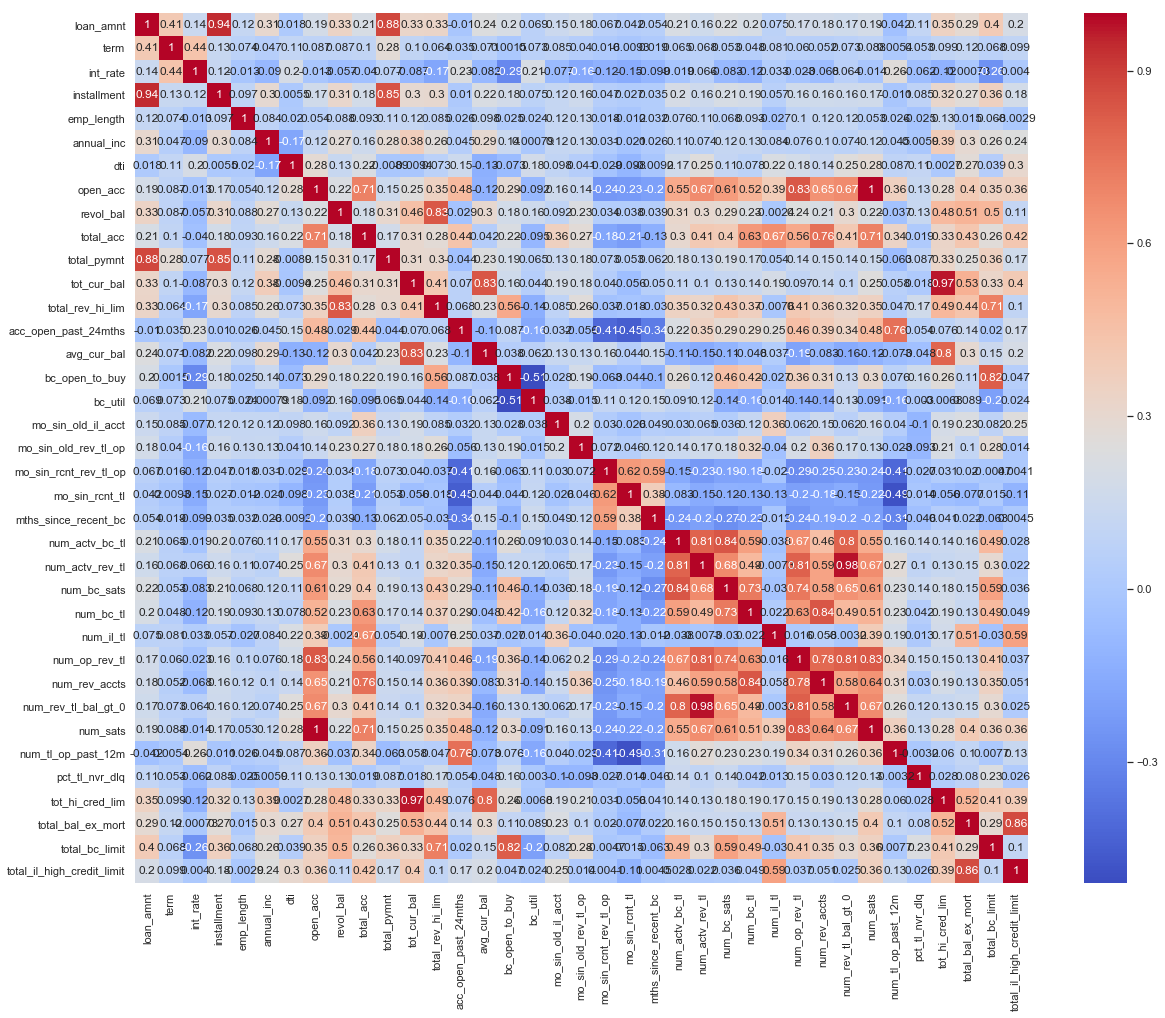

In [41]:
sns.heatmap(y2015.corr(), cmap='coolwarm', annot=True)

In [62]:
correlated = y2015.corr().abs().unstack().sort_values(ascending=False)
correlated[correlated<0.90]

total_pymnt                 loan_amnt                     0.876294
loan_amnt                   total_pymnt                   0.876294
total_bal_ex_mort           total_il_high_credit_limit    0.864517
total_il_high_credit_limit  total_bal_ex_mort             0.864517
total_pymnt                 installment                   0.850441
installment                 total_pymnt                   0.850441
num_bc_tl                   num_rev_accts                 0.839283
num_rev_accts               num_bc_tl                     0.839283
num_bc_sats                 num_actv_bc_tl                0.838795
num_actv_bc_tl              num_bc_sats                   0.838795
avg_cur_bal                 tot_cur_bal                   0.834840
tot_cur_bal                 avg_cur_bal                   0.834840
revol_bal                   total_rev_hi_lim              0.833423
total_rev_hi_lim            revol_bal                     0.833423
num_op_rev_tl               open_acc                      0.82

There a few variables that have extremely high correlations, such as loan amount and installment which makes sense since the payment is derived from the loan. Will delete these from the CSV and reimport into the notebook

In [67]:
y2015v2 = pd.read_csv('cleanfile.csv', skipinitialspace=False)
y2015v2.drop('Unnamed: 0',axis=1, inplace=True)

In [69]:
correlatedv2 = y2015v2.corr().abs().unstack().sort_values(ascending=False)
correlatedv2[correlatedv2>0.80]

total_il_high_credit_limit  total_il_high_credit_limit    1.0
mo_sin_old_il_acct          mo_sin_old_il_acct            1.0
pct_tl_nvr_dlq              pct_tl_nvr_dlq                1.0
num_tl_op_past_12m          num_tl_op_past_12m            1.0
num_rev_tl_bal_gt_0         num_rev_tl_bal_gt_0           1.0
num_rev_accts               num_rev_accts                 1.0
num_il_tl                   num_il_tl                     1.0
num_actv_bc_tl              num_actv_bc_tl                1.0
mths_since_recent_bc        mths_since_recent_bc          1.0
mo_sin_rcnt_tl              mo_sin_rcnt_tl                1.0
mo_sin_rcnt_rev_tl_op       mo_sin_rcnt_rev_tl_op         1.0
mo_sin_old_rev_tl_op        mo_sin_old_rev_tl_op          1.0
bc_util                     bc_util                       1.0
total_bc_limit              total_bc_limit                1.0
avg_cur_bal                 avg_cur_bal                   1.0
acc_open_past_24mths        acc_open_past_24mths          1.0
total_ac

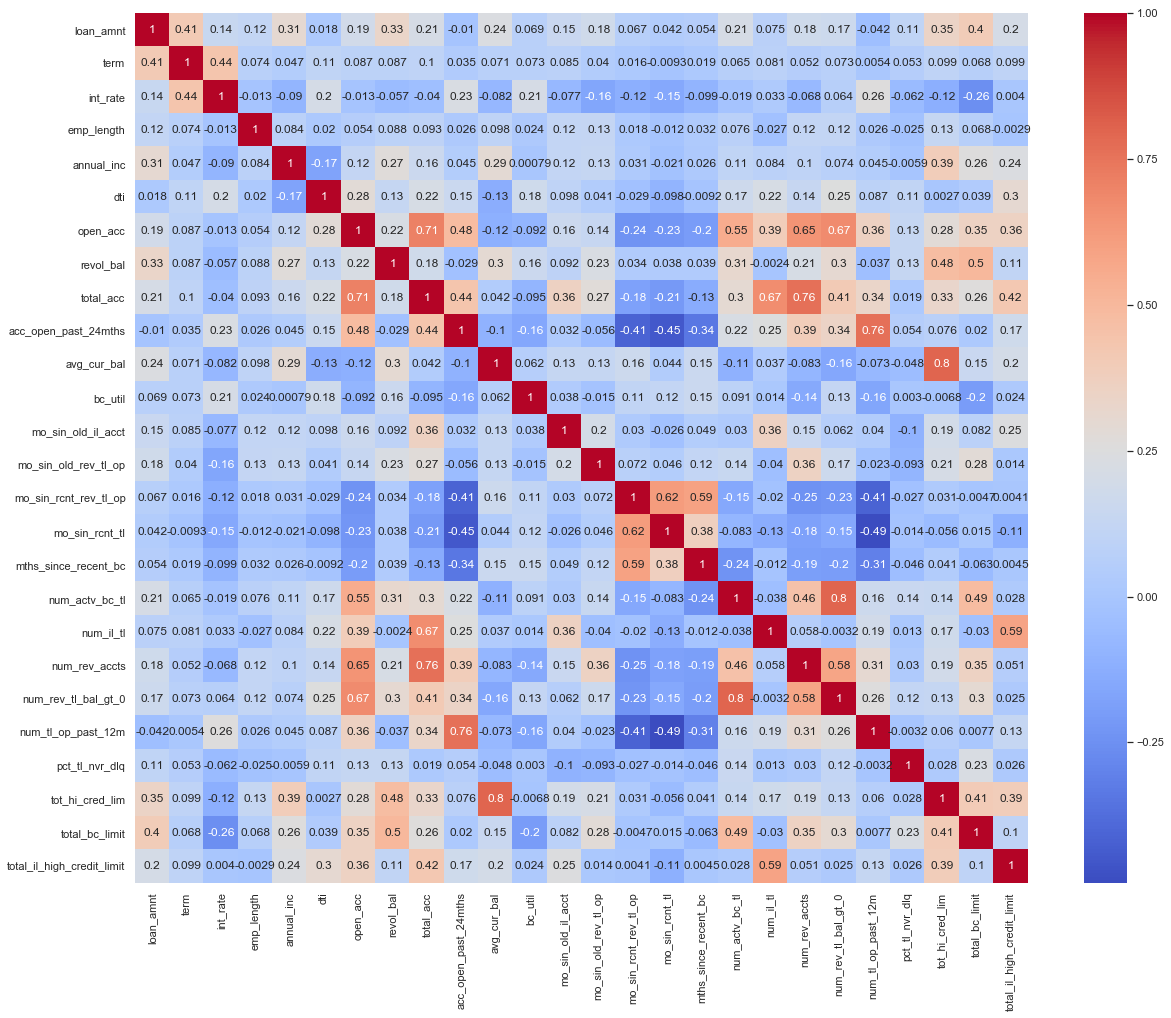

In [71]:
sns.heatmap(y2015v2.corr(), cmap='coolwarm', annot=True)

All extreme correlations (above 0.80) are gone, so the dataset looks ready to be modeled

In [73]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015v2.drop('loan_status', 1)
Y = y2015v2['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=9)

/home/diegofvargas/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=9.
  % (min_groups, self.n_splits)), Warning)


array([0.69819627, 0.71931099, 0.72283131, 0.71781829, 0.71703678,
       0.71398038, 0.71051788, 0.71020626, 0.70146414])